In [1]:
import anndata
import tensorflow as tf
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
import math
import pickle
import seaborn as sns
import scipy
import sys
import scanpy as sc
import pandas as pd
from scbasset.utils import *
from analyse_function import *

2024-05-27 13:52:33.282245: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-27 13:52:33.845935: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-27 13:52:33.846101: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-27 13:52:33.950709: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-27 13:52:34.197609: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-27 13:52:34.199937: I tensorflow/core/platform/cpu_feature_guard.cc:1

### Choices

In [12]:
###############
# filter info # 
###############

filter_info = 'filtered'
#filter_info = 'not_filtered'
#filter_info = 'filtered_controle'

##############
# model info #
##############

model_info = 'l2_regularization/0_5'
#model_info = 'l2_regularization/1'
#model_info = 'focal_loss/'

###### jsp ######
jsp = 'chr_exclusion_filtered_early_stop'

#############
# data info #
#############

type_data = 'enhancer'
#type_data = 'promotor'
#type_data ='enhancer_promotor'

# Import data

In [13]:
path = f'../../../results_scbasset/{type_data}'

ad_file = f'{path}/data/{filter_info}/cage_{type_data}_ad.h5ad'
trained_model = f'{path}/model/{model_info}/{jsp}/best_model.h5'
results_path= f'{path}/model/{model_info}/{jsp}/results'
hormone_path= '../../../results_scbasset/data/CAGE/output.csv'
results_file = f'{results_path}/cage_{type_data}_ad_embedding.h5ad'

In [14]:
ad_results = anndata.read_h5ad(results_file)
plotting_embedding(ad_results, 'Patient', type_data, results_path, title = '')
plotting_embedding(ad_results, 'Hormone', type_data, results_path)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '../../../results_scbasset/enhancer/model/l2_regularization/0_5/chr_exclusion_filtered_early_stop/results/cage_enhancer_ad_embedding.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [15]:
os.makedirs(results_path, exist_ok=True)

# read h5ad file
ad = anndata.read_h5ad(ad_file)

model = load_model(ad, trained_model)

# intercept vs. depth

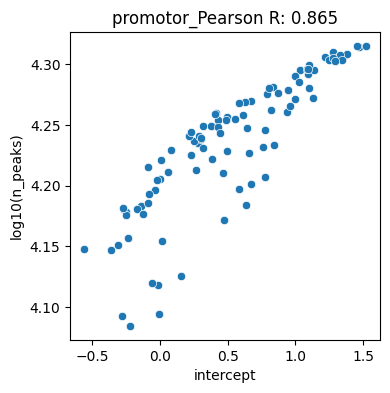

In [5]:
intercept_depth(ad, model, type_data)

# Embeddings

/home/pascal/Norway/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/pascal/Norway/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


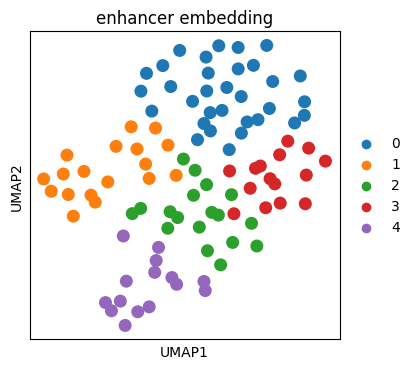

In [16]:
embedding(model, type_data, results_path)

plotting_embedding(ad, 'leiden', type_data, results_path)

## Patient vs cell line

In [17]:
add_patient_info(ad)

/home/pascal/Norway/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/pascal/Norway/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


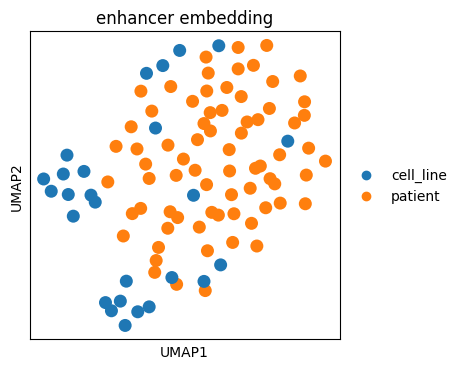

In [18]:
plotting_embedding(ad, 'Patient', type_data, results_path)

## Hormone

In [19]:
add_hormone_info(ad, hormone_path)

/home/pascal/Norway/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/pascal/Norway/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


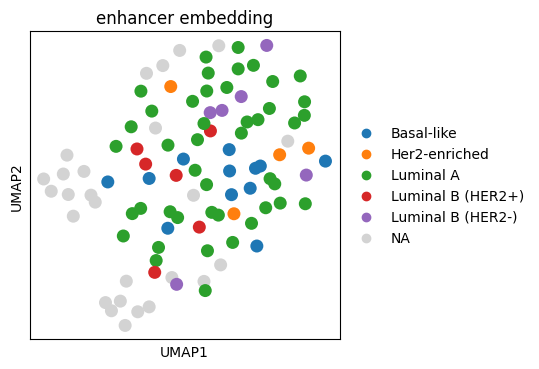

In [20]:
plotting_embedding(ad, 'Hormone', type_data, results_path)

In [21]:
ad.write(f'{results_path}/cage_{type_data}_ad_embedding.h5ad')

# Only patient embeddings

In [120]:
obs_data = ad.obs

# take only the patients
filtered_obs_data = obs_data[obs_data['Patient'].str.contains('patient', case=False)]
filtered_indices = filtered_obs_data.index
filtered_ad = ad[filtered_indices]


/home/pascal/Stage_Norvege2/SSHFS/code_scbasset/source/analyse/analyse_function.py:52: ImplicitModificationWarning: Setting element `.obsm['projection']` of view, initializing view as actual.
  ad_file.obsm['projection'] = projection_data.values
/home/pascal/Norway/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/pascal/Norway/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


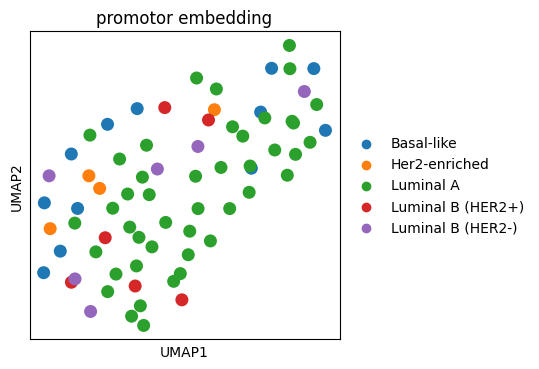

In [121]:
plotting_embedding(filtered_ad, 'Hormone', type_data, results_path, option=True)